___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

Bu kod bloğu genellikle veri analizi ve görselleştirme işlemlerinde kullanılan yaygın kütüphaneleri ve yapılandırmaları içerir. Bu şekilde, bu kütüphanelere ve bazı önemli yapılandırmalara kolay erişim sağlanır ve veri analizi ve görselleştirme işlemlerinin daha kolay ve düzenli bir şekilde yapılması sağlanır.

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Bu kod bloğu, TensorFlow Keras kütüphanesinde bulunan fashion_mnist veri kümesini yüklemek için kullanılır. fashion_mnist veri kümesi, giyim eşyalarının 10 farklı sınıfa ait 60,000 eğitim örneği ve 10,000 test örneği içeren bir görüntü veri kümesidir.

Veri kümesi, eğitim ve test verilerini (X_train, y_train) ve (X_test, y_test) şeklinde iki ayrı parçaya böler.

X_train: Eğitim görüntü verilerini içeren 3 boyutlu bir NumPy dizisi. Her bir görüntü 28x28 piksel boyutlarına sahiptir.

y_train: Eğitim verilerinin etiketlerini içeren 1 boyutlu bir NumPy dizisi. Her bir etiket, görüntünün hangi sınıfa ait olduğunu temsil eder.

X_test: Test görüntü verilerini içeren 3 boyutlu bir NumPy dizisi. Eğitim verileriyle aynı boyut ve yapısı vardır.

y_test: Test verilerinin etiketlerini içeren 1 boyutlu bir NumPy dizisi. Eğitim verileriyle aynı yapıya sahiptir.

Bu şekilde, fashion_mnist veri kümesi, makine öğrenimi modellerini eğitme ve değerlendirme amacıyla kullanılabilir. Eğitim verileri, modelin giyim eşyalarının sınıflarını tanımasını öğrenmek için kullanılırken, test verileri modelin performansını değerlendirmek için kullanılabilir.

In [3]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [4]:
X_train[3].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [5]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

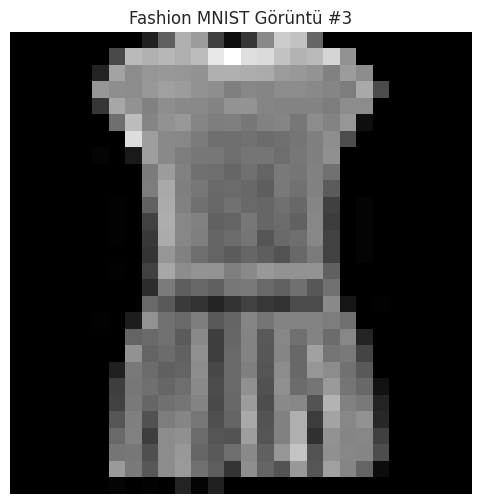

In [6]:
import matplotlib.pyplot as plt
# İstediğiniz bir görüntünün indisini seçin
indeks = 3  # Örnek olarak, ilk görüntüyü alalım

# Görüntüyü göster
plt.imshow(X_train[indeks], cmap='gray')
plt.title(f'Fashion MNIST Görüntü #{indeks}')
plt.axis('off')  # Eksenleri kapat
plt.show()

In [7]:
# Checking the shape of one image
X_train[3].shape


(28, 28)

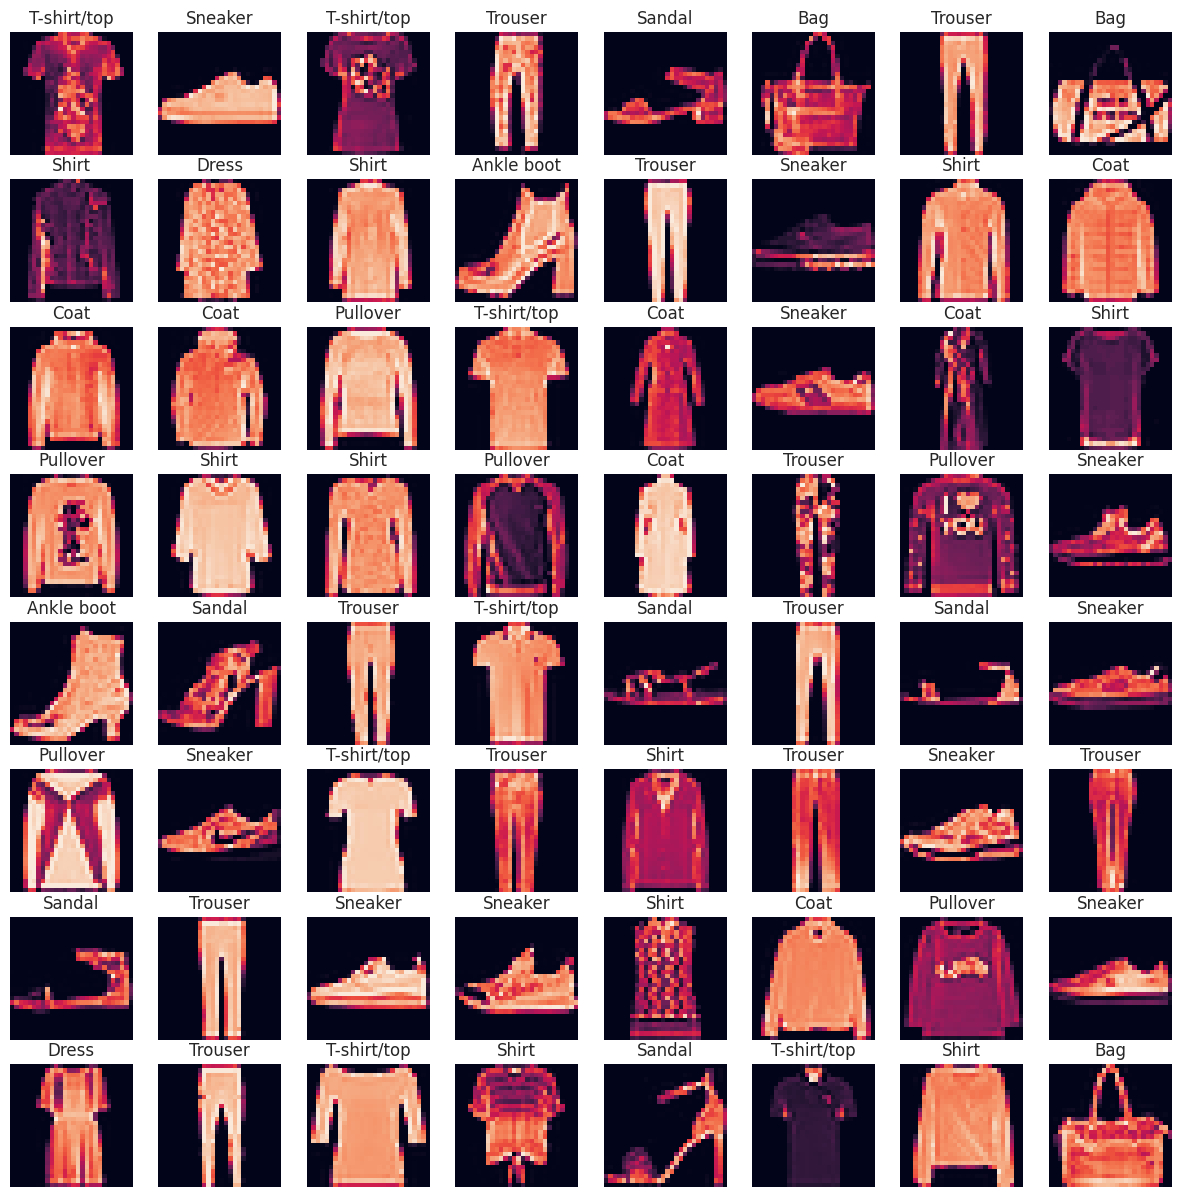

In [8]:
plt.figure(figsize=(15, 15))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [9]:
X_train[5].min()

0

In [10]:
X_train[5].max()

255

In [11]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [12]:
X_train[5].max()

1.0

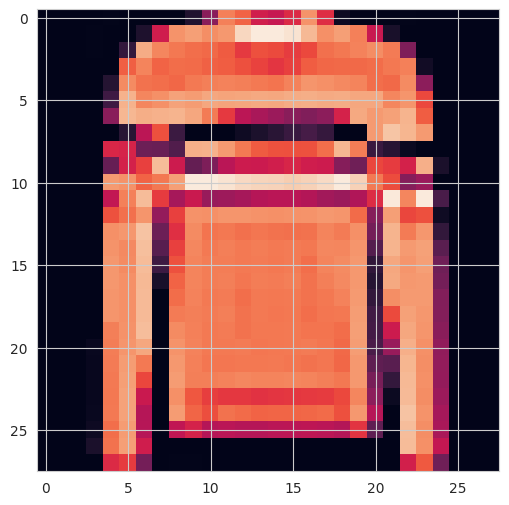

In [13]:
plt.imshow(X_train[5])

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [14]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [16]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Bu kod bloğu, X_train ve X_test veri dizilerini yeniden şekillendirerek 4 boyutlu tensörlere dönüştürür.

Önceki adımlarda, X_train ve X_test veri dizileri 3 boyutlu olarak tanımlanmıştı. Bu durum, görüntülerin boyutlarının (28, 28) olduğunu ve tek bir kanala sahip olduğunu gösterir.

Ancak, bir Keras modeline girdi olarak verilen görüntü verileri genellikle 4 boyutlu tensör şeklinde olmalıdır. Bu 4 boyutlu tensörde, örnek sayısı, görüntü boyutları, kanal sayısı gibi bilgiler yer alır.

Bu kod bloğunda reshape() fonksiyonu kullanılarak X_train ve X_test veri dizileri yeniden şekillendirilir. X_train.shape[0] ifadesi, X_train veri dizisinin birinci boyutunu temsil eder, yani örnek sayısını. 28, 28, 1 ifadesi, yeniden şekillendirilen tensörün hedef boyutlarını belirtir. Burada, görüntü boyutları (28, 28) olarak kalırken, kanal sayısı 1 olarak belirtilir.

Sonuç olarak, X_train ve X_test veri dizileri 4 boyutlu tensörlere dönüştürülür. Bu şekilde, bu veri dizileri bir Keras modeline giriş olarak kullanılabilir.

In [17]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [18]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [19]:
y_train.shape

(60000,)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

Bu kod bloğu, etiket verilerini (yani sınıf bilgilerini) kategorik (one-hot) kodlama şekline dönüştürür. Bu, sınıf etiketlerini temsil eden vektörleri, çok sınıflı bir sınıflandırma problemi için kullanılan kategorik formatına dönüştürür.

to_categorical() fonksiyonu, TensorFlow Keras kütüphanesinin utils modülünde bulunan bir fonksiyondur. Bu fonksiyon, girdi olarak alınan etiket verilerini kategorik formata dönüştürür.

y_train: Eğitim verilerinin etiketlerini temsil eden 1 boyutlu bir NumPy dizisi.

y_test: Test verilerinin etiketlerini temsil eden 1 boyutlu bir NumPy dizisi.

to_categorical() fonksiyonu, girdi etiket verilerini num_classes parametresinde belirtilen sınıf sayısı kadar kategorik forma dönüştürür. Bu örnekte, num_classes=10 olarak belirtilmiştir, çünkü fashion_mnist veri kümesinde 10 farklı giyim eşyası sınıfı bulunmaktadır.

Sonuç olarak, Y_train ve Y_test değişkenleri, kategorik olarak kodlanmış etiket verilerini içeren 2 boyutlu NumPy dizileridir.

Y_train.shape ifadesi, Y_train dizisinin boyutlarını döndürür. Bu durumda, çıktı (60000, 10) şeklindedir, yani 60000 örneğe ve 10 sınıfa sahip kategorik etiket verilerini temsil eder.

In [22]:
y_train[0]

9

In [23]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2),strides=(1, 1)))


model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))


model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


Bu kod bloğu, TensorFlow Keras kütüphanesi kullanılarak bir derin öğrenme modeli oluşturur.

Sequential model, ardışık bir şekilde katmanları eklememizi sağlayan bir model yapısıdır.

Aşağıda, her bir katmanın ne yaptığını açıklayan adımları bulabilirsiniz:

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same')): İlk olarak, modelimize bir 2D Convolutional katmanı eklenir. Bu katman, 28 filtre ve 3x3 kernel boyutuna sahiptir. Giriş şekli (input_shape) olarak (28, 28, 1) belirtilir, çünkü veri setindeki görüntüler 28x28 pikseldir ve tek bir kanala sahiptir. ReLU aktivasyon fonksiyonu kullanılır ve padding 'same' olarak ayarlanır.

model.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1))): Ardından, bir Max Pooling katmanı eklenir. Bu katman, 2x2 boyutunda bir havuzlama boyutuna ve 1x1 adımlara sahiptir. Bu, girdi veriyi örnekleme ve boyutunu küçültme işlevi görür.

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same')): Bir başka 2D Convolutional katmanı eklenir. Bu katman da 28 filtre ve 3x3 kernel boyutuna sahiptir. Aktivasyon fonksiyonu olarak ReLU kullanılır ve padding 'same' olarak ayarlanır.

model.add(MaxPool2D(pool_size=(2, 2))): Bir Max Pooling katmanı daha eklenir. Bu katman, 2x2 boyutunda bir havuzlama boyutuna sahiptir. Adımlar belirtilmemiştir, bu nedenle varsayılan adımlar kullanılır.

model.add(Flatten()): Düzleştirme (Flatten) katmanı eklenir. Bu katman, veriyi düzleştirerek (yani 1D vektöre dönüştürerek) bir sonraki tam bağlı katmana beslemek için kullanılır.

model.add(Dense(128, activation='relu')): Bir tam bağlı (Dense) katman eklenir. Bu katman, 128 nörona sahiptir ve ReLU aktivasyon fonksiyonu kullanır.

model.add(Dense(10, activation='softmax')): Son olarak, bir çıkış katmanı eklenir. Bu katman, 10 nörona (10 sınıf için) ve softmax aktivasyon fonksiyonuna sahiptir.

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']): Model derlenir. Kayıp fonksiyonu olarak kategorik çapraz entropi (categorical_crossentropy) kullanılır, optimizer olarak RMSprop kullanılır ve doğruluk (accuracy) metriği kullanılır. Bu, modelin eğitim sürecinde kaybı minimize etmek ve doğruluk metriğini maksimize etmek için kullanılan optimizasyon yöntemlerini belirler.

Bu adımdan sonra, modelimiz eğitim için hazırdır. Artık veri setine fit edebiliriz.

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 28)        7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               6

model.summary() fonksiyonu, oluşturulan modelin özetini ekrana yazdırır. Bu özet, modelin katmanlarını, katmanlar arasındaki parametre sayılarını ve toplam parametre sayısını gösterir.

Özet, her katmanın sıralı olarak listelendiği ve her katmanın çıktı şeklinin (output shape), parametre sayısının ve toplam parametre sayısının görüntülendiği bir tablodur. Özet ayrıca toplam parametre sayısını ve her bir katmanın çıktı şeklini daha anlaşılır bir şekilde görselleştirir.

Bu özet, modelin mimarisini ve katmanlar arasındaki bağlantıları hızlı bir şekilde anlamak için kullanışlıdır. Ayrıca, modeldeki parametre sayılarını kontrol etmek ve modelin boyutunu değerlendirmek için de faydalıdır.

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [26]:
# EarlyStopping geri çağırısını oluştur
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=2, restore_best_weights = True)

# Modeli eğit
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 12s 5ms/step - loss: 0.3821 - accuracy: 0.8618 - val_loss: 0.2959 - val_accuracy: 0.8936
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2475 - accuracy: 0.9113 - val_loss: 0.2492 - val_accuracy: 0.9121
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2092 - accuracy: 0.9247 - val_loss: 0.2528 - val_accuracy: 0.9124
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1818 - accuracy: 0.9347 - val_loss: 0.2346 - val_accuracy: 0.9140
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1620 - accuracy: 0.9410 - val_loss: 0.2315 - val_accuracy: 0.9208
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1461 - accuracy: 0.9479 - val_loss: 0.2367 - val_accuracy: 0.9186
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1346 - accuracy: 0.9525 - val_loss: 0.2597 - val_accuracy

Bu kod bloğu, modelin eğitimini gerçekleştirirken EarlyStopping geri çağırısını kullanır.

EarlyStopping geri çağırısı, eğitim sırasında belirli bir metriği (monitor) izleyerek eğitimi durdurmayı veya devam etmeyi belirler. Burada val_accuracy (doğrulama doğruluğu) metriği izlenir ve maksimum değerinde durdurma yapılır.

mode="max" parametresi, izlenen metriğin maksimize edilmesini belirtir. Yani, doğrulama doğruluğu metriği için en yüksek değeri arayacaktır.

patience=2 parametresi, eğitimde iyileştirme görülmediği durumda kaç epoch boyunca bekleyeceğimizi belirtir. Burada 2 olarak belirtilmiştir, yani 2 epoch boyunca doğrulama doğruluğunda iyileşme görülmezse eğitimi durdurur.

restore_best_weights=True parametresi, en iyi doğrulama doğruluğuna sahip ağırlıkları geri yüklemeyi sağlar. Bu şekilde, eğitim durduğunda en iyi performans gösteren ağırlıkları kullanabiliriz.

model.fit() fonksiyonu, modeli eğitmek için kullanılır. Eğitim verileri X_train ve Y_train ile beslenir. batch_size=32 parametresi, her eğitim adımında kullanılacak örnek sayısını belirtir. epochs=50 parametresi, eğitimin kaç epoch (döngü) boyunca gerçekleştirileceğini belirtir.

validation_data=(X_test,Y_test) parametresi, modelin her epoch sonunda doğrulama veri kümesi üzerinde performansını değerlendirmesini sağlar.

callbacks=[early_stop] parametresi, geri çağırıları belirlemek için kullanılır. Burada, EarlyStopping geri çağırısı kullanılır.

In [27]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.382,0.862,0.296,0.894
1,0.247,0.911,0.249,0.912
2,0.209,0.925,0.253,0.912
3,0.182,0.935,0.235,0.914
4,0.162,0.941,0.231,0.921
5,0.146,0.948,0.237,0.919
6,0.135,0.953,0.260,0.924


**TASK 7: Plot values of metrics you used in your model.**

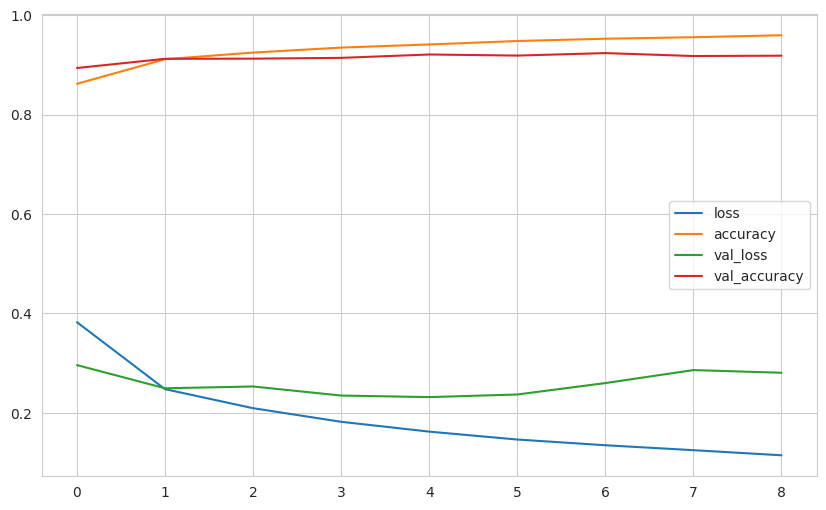

In [28]:
summary.plot();

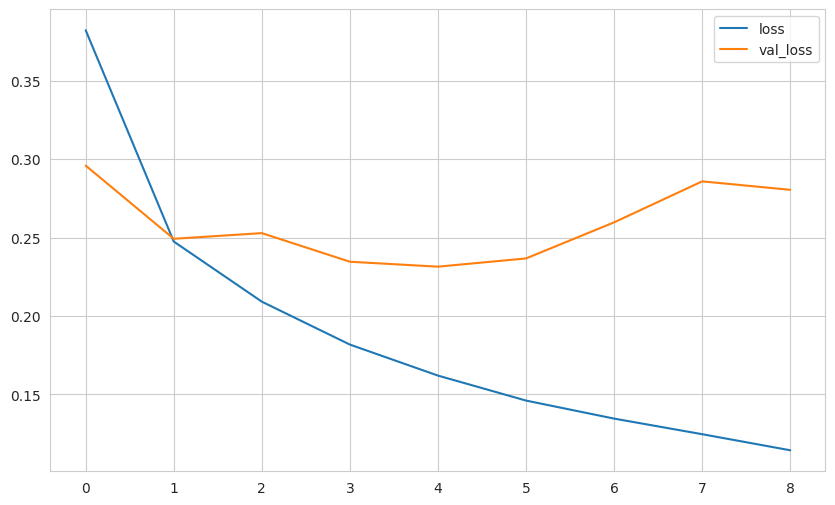

In [30]:
summary[["loss", "val_loss"]].plot();

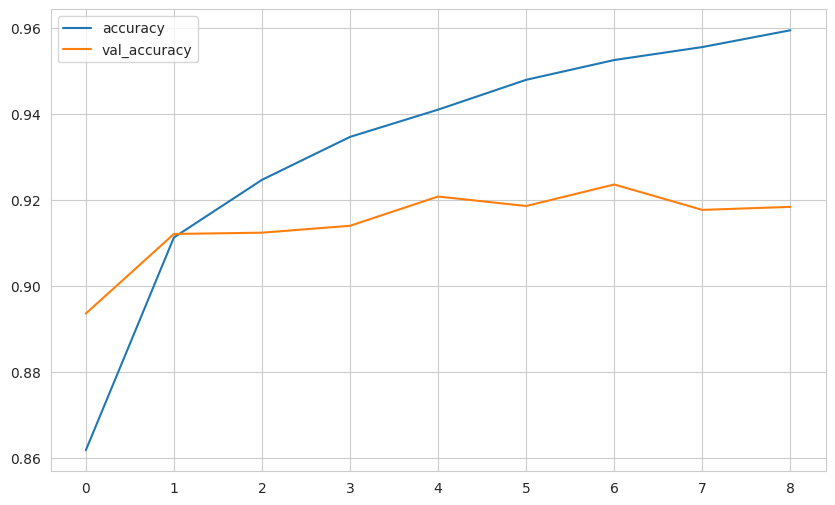

In [29]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [32]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [33]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2597 - accuracy: 0.9236


[0.25970569252967834, 0.9236000180244446]

In [34]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25970569252967834
Test accuracy: 0.9236000180244446


In [35]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[0.        , 0.        , 0.        , ..., 0.00000121, 0.        ,
        0.9999987 ],
       [0.00000342, 0.        , 0.9999964 , ..., 0.        , 0.        ,
        0.        ],
       [0.00000001, 0.9999999 , 0.00000001, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00094808, 0.00000269, 0.00005004, ..., 0.00191803, 0.00031395,
        0.00005235]], dtype=float32)

In [36]:
pred_prob.shape

(10000, 10)

In [37]:
pred_prob[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00000015, 0.        , 0.00000121, 0.        , 0.9999987 ],
      dtype=float32)

In [38]:
np.argmax(pred_prob[0])

9

In [39]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.89      0.88      1000
           3       0.90      0.95      0.92      1000
           4       0.90      0.87      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.79      0.78      0.78      1000
           7       0.95      0.98      0.97      1000
           8       0.98      0.99      0.99      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [41]:
print(confusion_matrix(y_test, y_pred))

[[851   1  22  17   2   1 101   0   5   0]
 [  3 980   1  12   0   0   2   0   2   0]
 [ 13   0 893  14  36   0  44   0   0   0]
 [  6   3   6 953  14   0  18   0   0   0]
 [  0   1  58  28 868   1  42   0   2   0]
 [  0   0   0   1   0 971   0  17   3   8]
 [ 73   0  58  35  48   0 780   0   6   0]
 [  0   0   0   0   0   1   0 985   1  13]
 [  2   0   1   4   1   1   0   1 990   0]
 [  0   0   0   0   0   4   1  30   0 965]]


<Axes: >

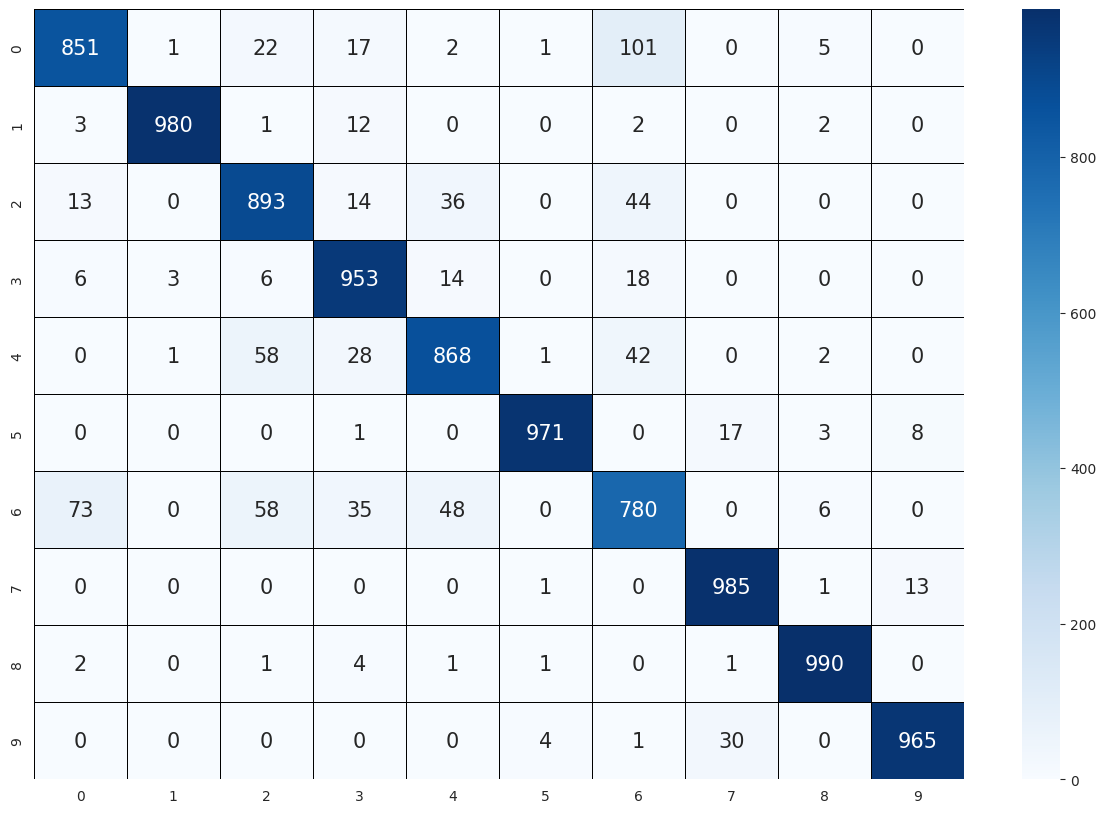

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [62]:
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [43]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

# y_test, y_pred'i karşılaştırıp aynı olmayanları almak için np.not_equal'i kullanıyoruz.

array([False, False, False, ..., False, False, False])

In [44]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

# np.not_equal(y_test, y_pred).sum() ile True'ları toplayıp döndürüyor (toplam hatalı değer)

764

In [45]:
np.equal(y_test, y_pred).sum()

## toplam doğru tahmin sayısı.

9236

## Prediction

In [63]:
my_image = X_test[44]

In [64]:
my_image.shape

(28, 28, 1)

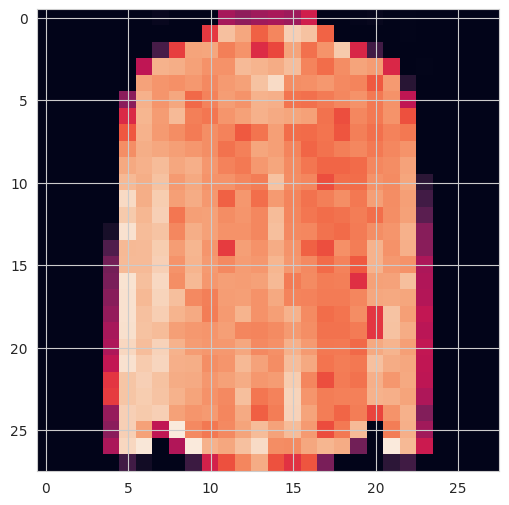

In [65]:
plt.imshow(my_image)

In [67]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

1/1 [==============================] - 0s 19ms/step


In [68]:
image_prediction

array([[0.00000479, 0.00000055, 0.00015591, 0.00002367, 0.06218776,
        0.00000408, 0.93736887, 0.00000148, 0.00000287, 0.00024999]],
      dtype=float32)

In [69]:
np.argmax(image_prediction, axis=1)

array([6])

In [70]:
result=np.argmax(image_prediction, axis=1)

In [71]:
classes[int(result)]

'Shirt'

In [72]:
model.save("asgcnn-1.h5")

In [73]:
import tensorflow as tf

model=tf.keras.models.load_model('asgcnn-1.h5')

In [74]:
X_test[3].shape

(28, 28, 1)

In [76]:
np.expand_dims(X_test[3],axis=0).shape

(1, 28, 28, 1)

In [77]:
pred=model.predict(np.expand_dims(X_test[3],axis=0))

1/1 [==============================] - 0s 78ms/step


In [78]:
np.argmax(pred)

1

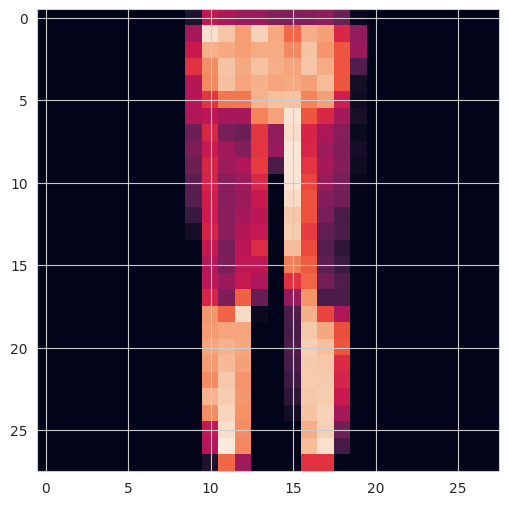

In [79]:
plt.imshow(X_test[3])

In [80]:
classes[3]

'Dress'

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___